## Load Library & Dataset

In [37]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [38]:
#import Dataset
retail = pd.read_csv('customer_shopping_data.csv')

retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Pre-Processing Data

In [39]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### Convert Type Data

In [40]:
retail['invoice_date'] = pd.to_datetime(retail['invoice_date'])
retail.dtypes

C:\Users\USER\AppData\Local\Temp\ipykernel_5196\2642017306.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  retail['invoice_date'] = pd.to_datetime(retail['invoice_date'])


invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [41]:
retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


### Duplicated Value

In [42]:
retail.duplicated().sum()

0

### Missing Value

In [43]:
retail.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

## Exploratory Data Analysis

### Statictic Summary

In [44]:
retail.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### Univariate Analysis - Numerical Variable

In [45]:
# Numerical datatypes
retail.select_dtypes(include=['int64','float64','Int64']).dtypes

age           int64
quantity      int64
price       float64
dtype: object

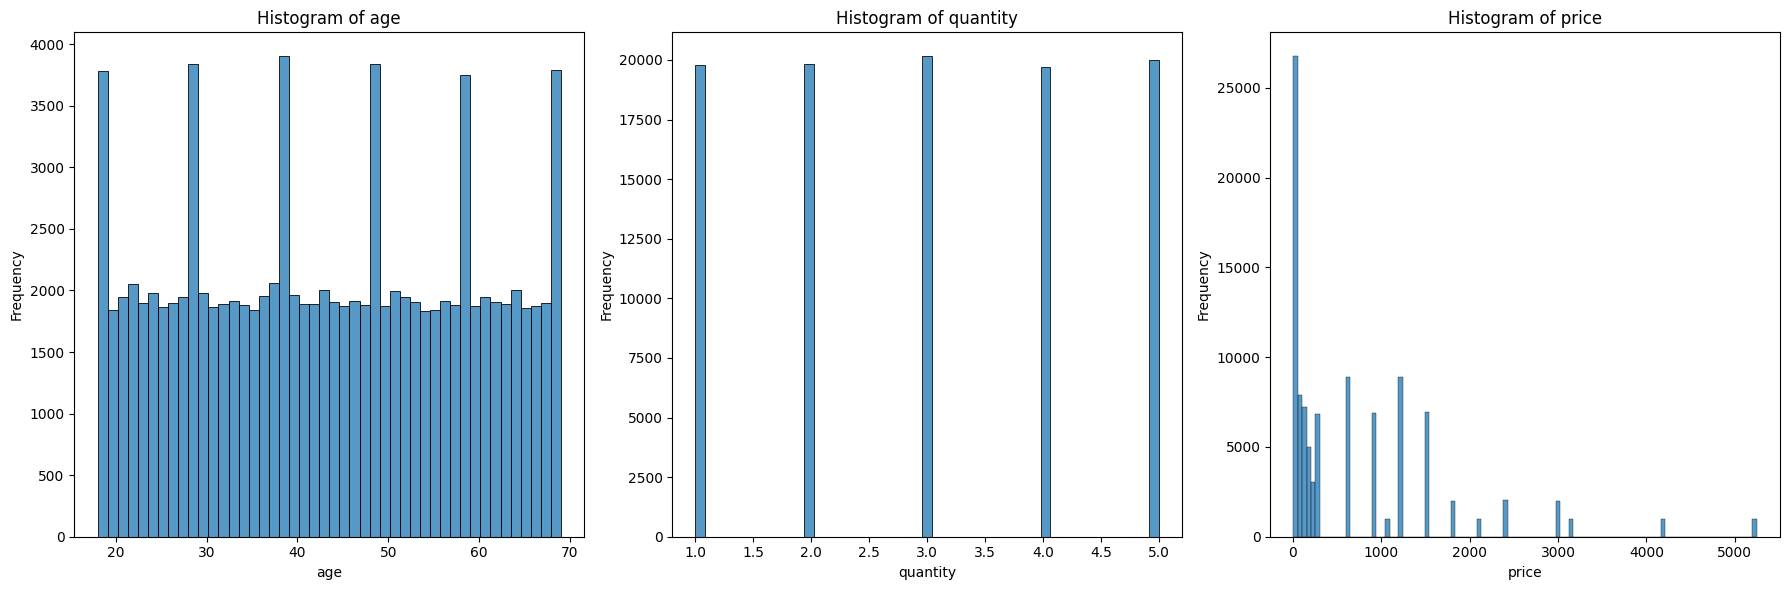

In [46]:
# Mendefinisikan kolom untuk diplot
columns = ['age', 'quantity', 'price']

# Membuat figure dan axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 baris, 3 kolom

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i, col in enumerate(columns):
    sns.histplot(data=retail, x=col, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


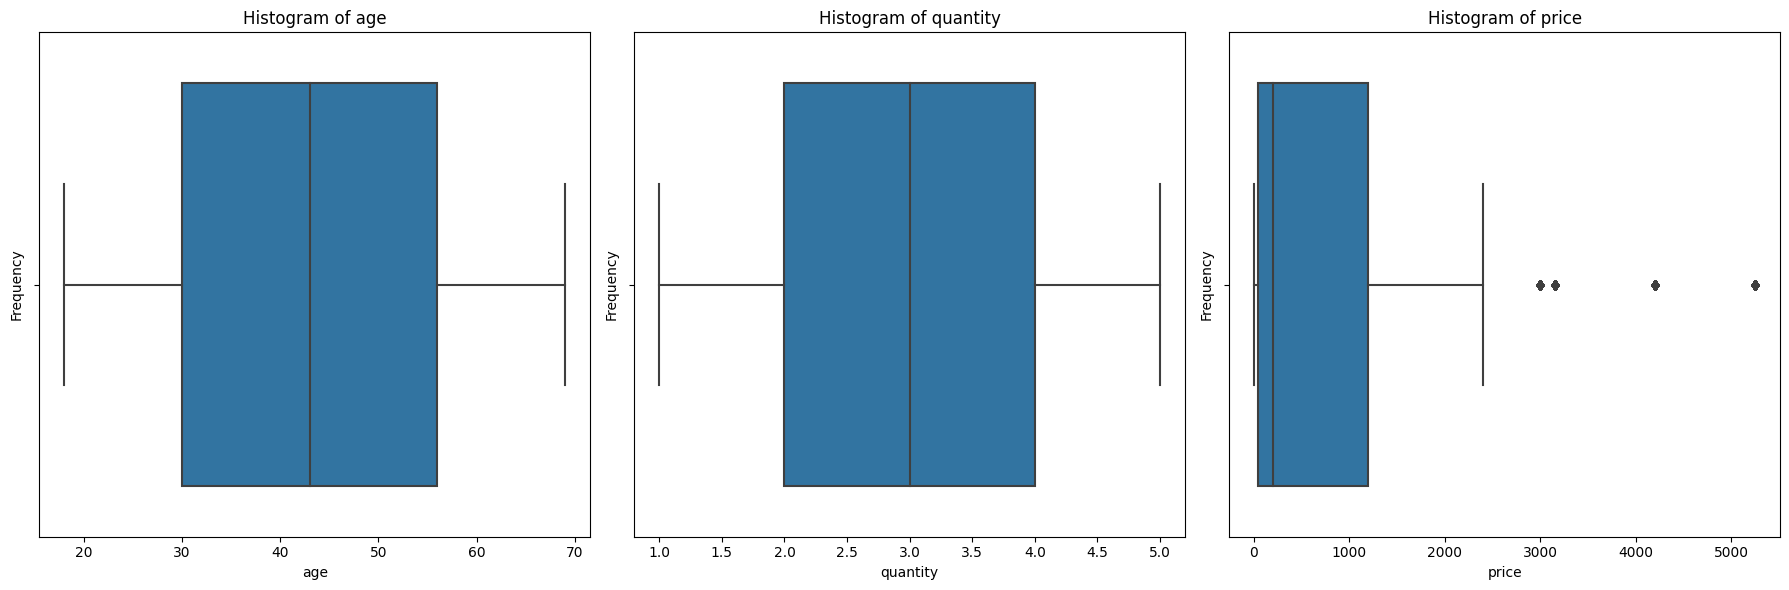

In [47]:
# Mendefinisikan kolom untuk diplot
columns = ['age', 'quantity', 'price']

# Membuat figure dan axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 baris, 3 kolom

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i, col in enumerate(columns):
    sns.boxplot(data=retail, x=col, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


### Univariate Analysis - Categorical Variable

In [48]:
# Categorical datatypes
retail.select_dtypes(exclude=['int64','float64','Int64']).dtypes

invoice_no                object
customer_id               object
gender                    object
category                  object
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

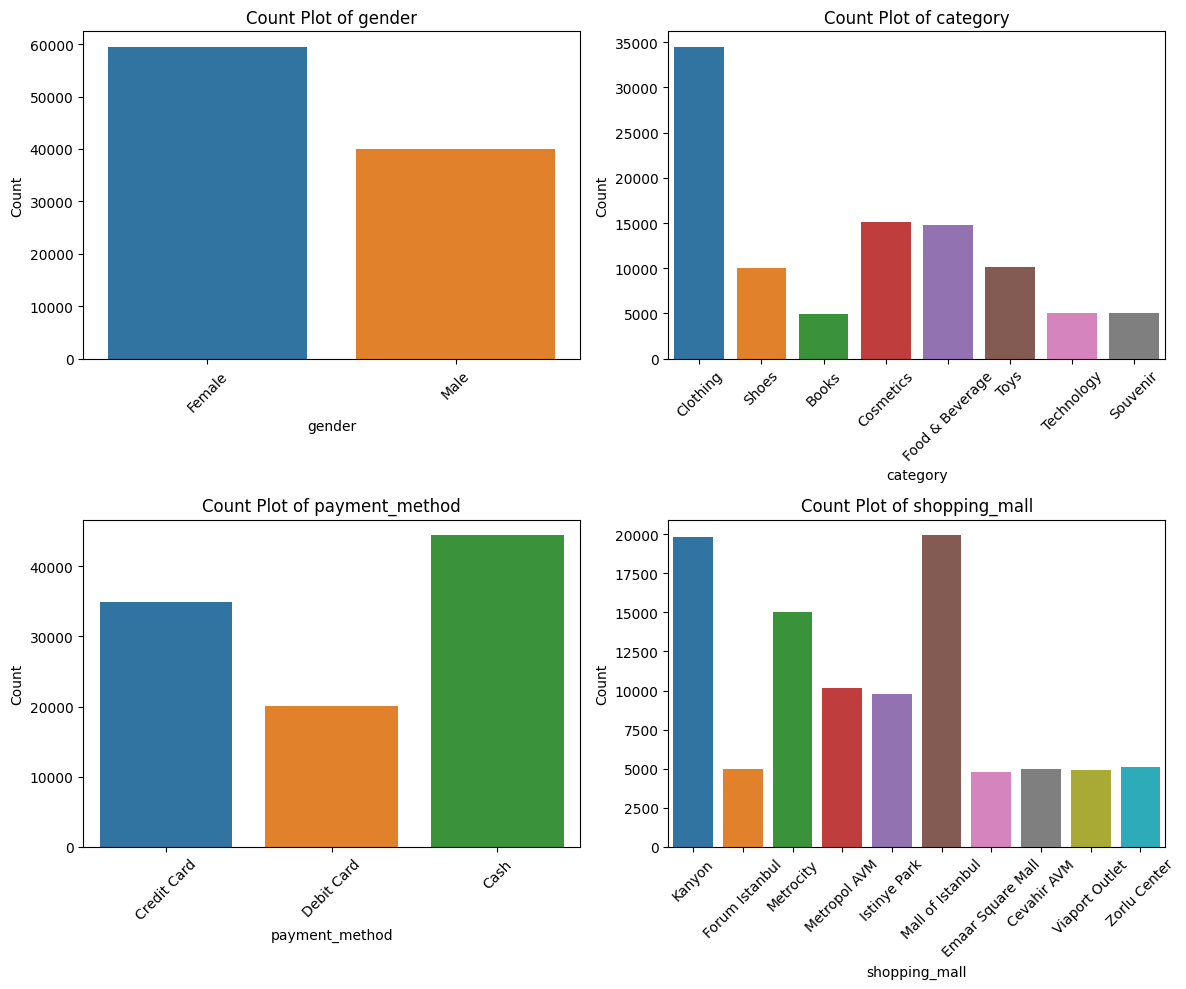

In [49]:
# Mendefinisikan kolom untuk diplot
columns = ['gender', 'category', 'payment_method', 'shopping_mall']

# Membuat figure dan axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 baris, 2 kolom

# Menggunakan loop untuk membuat count plot untuk setiap kolom
for i, col in enumerate(columns):
    sns.countplot(data=retail, x=col, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Count Plot of {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel('Count')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


### Bivariate Analysis

In [50]:
retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


#### Add Column Total Sales

In [51]:
retail['total_sales'] = retail['quantity'] * retail['price']

In [52]:
retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


#### Monthly Transaction

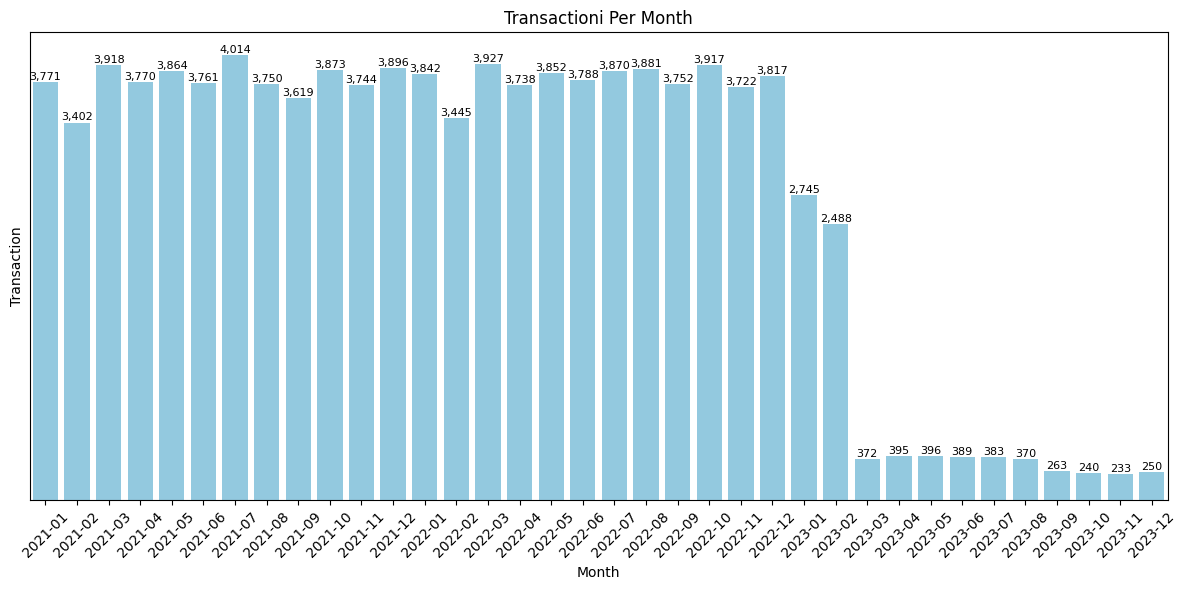

In [53]:
monthly_transactions = retail.groupby(retail['invoice_date'].dt.to_period('M'))['invoice_no'].count().reset_index()
monthly_transactions.columns = ['Month', 'Transaction']

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_transactions, x='Month', y='Transaction', color='skyblue')
plt.title('Transactioni Per Month')
plt.xlabel('Month')
plt.ylabel('Transaction')
plt.xticks(rotation=45)
plt.yticks([])  # Menghilangkan angka pada sumbu y
for index, value in enumerate(monthly_transactions['Transaction']):
    plt.text(index, value + 0.2, '{:,}'.format(value), ha='center', va='bottom', fontsize=8)  # Format angka dengan koma sebagai pemisah ribuan
plt.tight_layout()
plt.show()

#### Total Sales Per Month

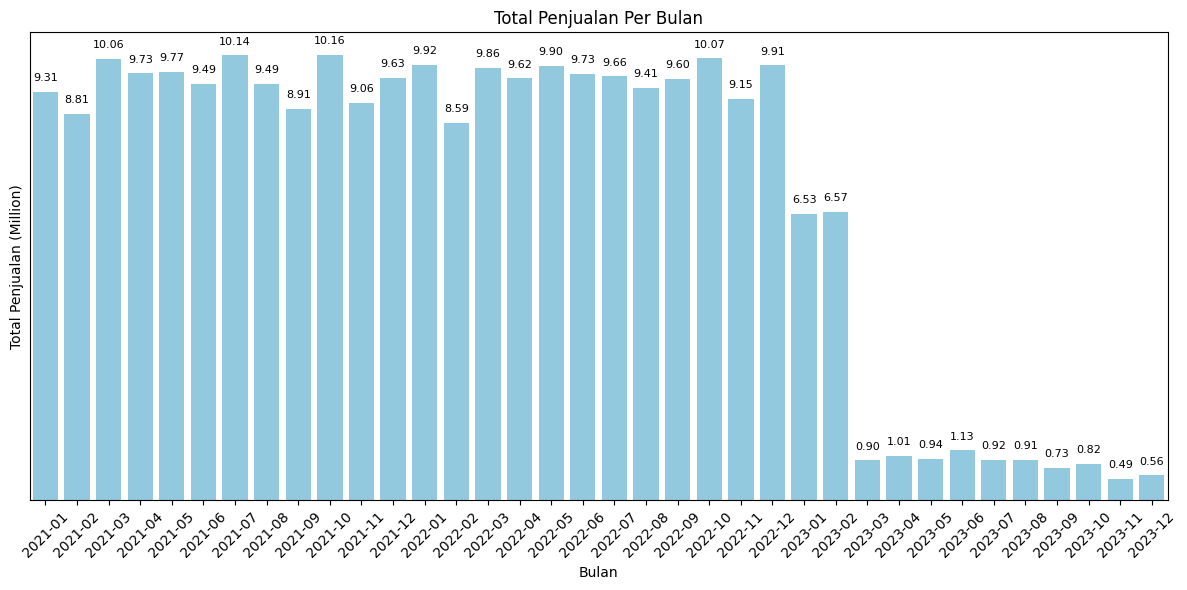

In [54]:
monthly_sales = retail.groupby(retail['invoice_date'].dt.to_period('M'))['total_sales'].sum().reset_index()
monthly_sales.columns = ['Bulan', 'Total Penjualan']
monthly_sales['Total Penjualan'] /= 1000000  # Membagi total penjualan dengan 1.000.000

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Bulan', y='Total Penjualan', color='skyblue')
plt.title('Total Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Million)')
plt.xticks(rotation=45)
plt.yticks([])  # Menghilangkan angka pada sumbu y
for index, value in enumerate(monthly_sales['Total Penjualan']):
    plt.text(index, value + 0.2, '{:,.2f}'.format(value), ha='center', va='bottom', fontsize=8)  # Format angka dengan koma sebagai pemisah ribuan
plt.tight_layout()
plt.show()


#### Customer by Gender

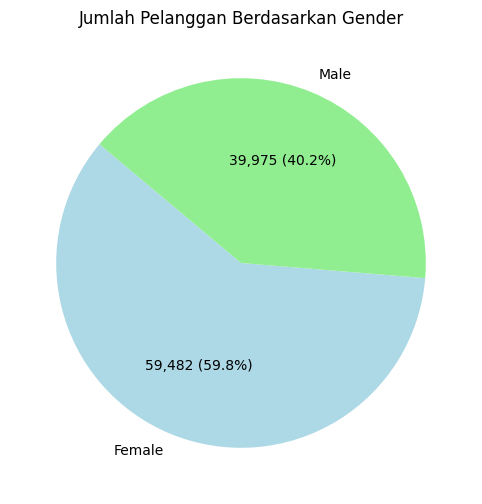

In [55]:
# Menghitung jumlah pelanggan berdasarkan gender
gender_counts = retail['gender'].value_counts()

# Fungsi untuk menampilkan jumlah absolut dan persentase
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:,} ({:.1f}%)'.format(val, pct)
    return my_autopct

# Membuat grafik pie
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=make_autopct(gender_counts), startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Jumlah Pelanggan Berdasarkan Gender')
plt.show()

#### Total Sales by Shop

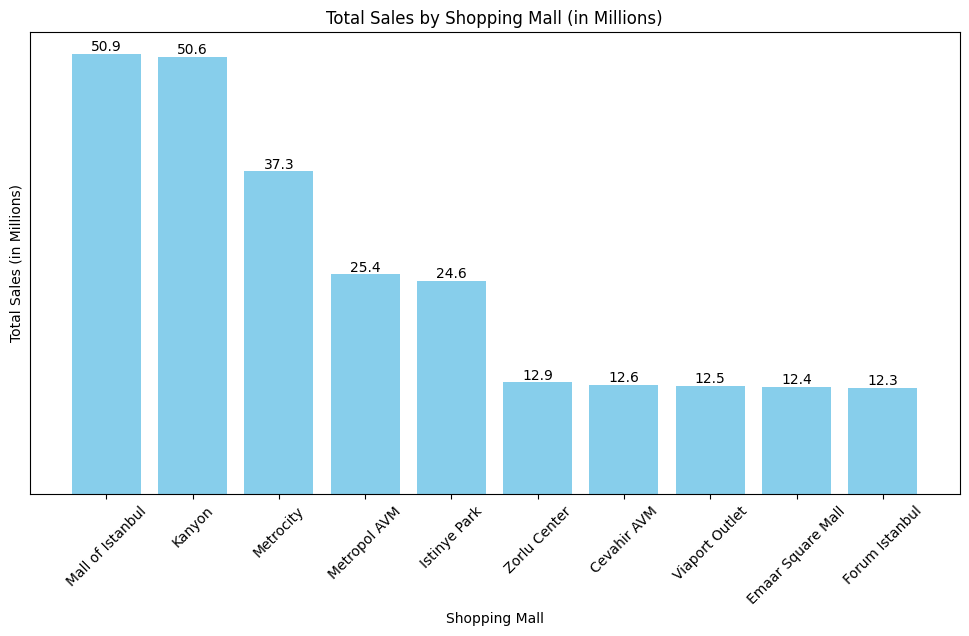

In [56]:
# Menghitung total penjualan per shopping mall
sales_by_mall = retail.groupby('shopping_mall')['total_sales'].sum().reset_index()

# Mengurutkan dari yang terbesar ke terkecil
sales_by_mall = sales_by_mall.sort_values(by='total_sales', ascending=False)

# Membuat grafik bar
plt.figure(figsize=(12, 6))
bars = plt.bar(sales_by_mall['shopping_mall'], sales_by_mall['total_sales'] / 1000000, color='skyblue')  # Membagi total sales dengan 1 juta
plt.title('Total Sales by Shopping Mall (in Millions)')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=45)

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.1f}'.format(yval), ha='center', va='bottom')

plt.yticks([])  # Menghilangkan angka pada sumbu y
plt.show()


#### Purchase by Category

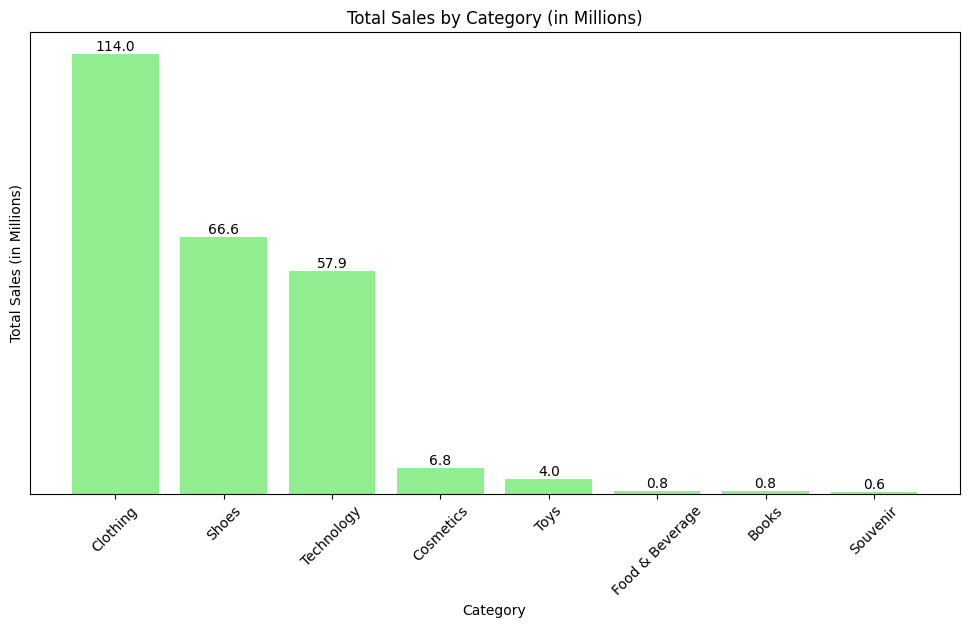

In [57]:
# Menghitung total penjualan per kategori
sales_by_category = retail.groupby('category')['total_sales'].sum().reset_index()

# Mengurutkan dari yang terbesar ke terkecil
sales_by_category = sales_by_category.sort_values(by='total_sales', ascending=False)

# Membuat grafik bar
plt.figure(figsize=(12, 6))
bars = plt.bar(sales_by_category['category'], sales_by_category['total_sales'] / 1000000, color='lightgreen')  # Membagi total sales dengan 1 juta
plt.title('Total Sales by Category (in Millions)')
plt.xlabel('Category')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=45)

# Menambahkan angka pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.1f}'.format(yval), ha='center', va='bottom')

plt.yticks([])  # Menghilangkan angka pada sumbu y
plt.show()


### Multivariate Analysis

#### Total Sales by Category & Gender

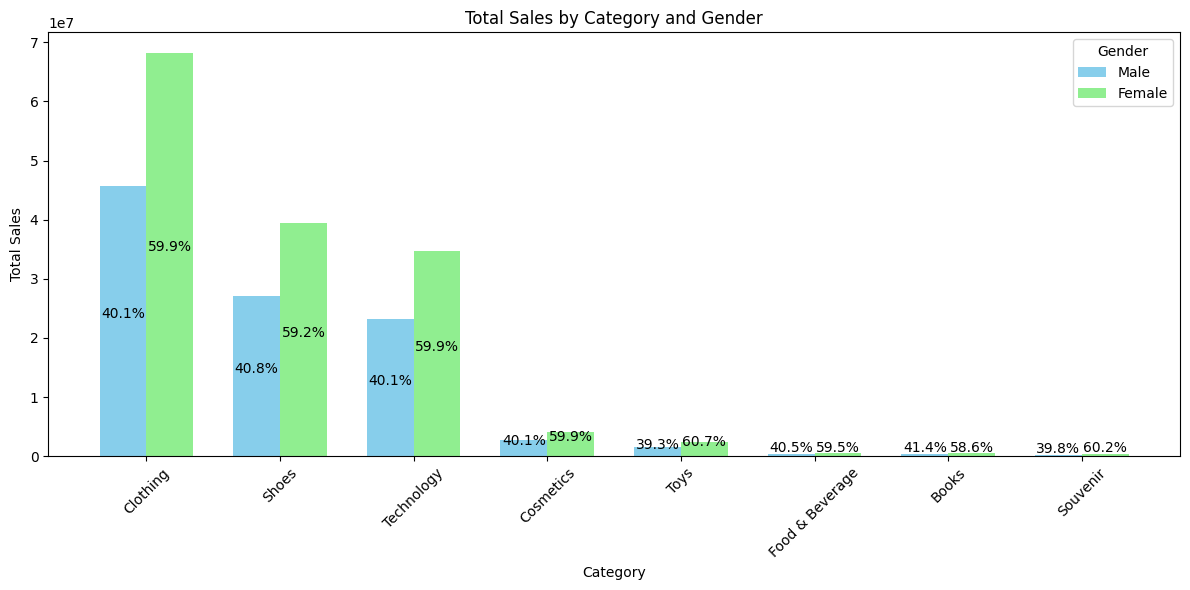

In [58]:
# Menghitung total penjualan per kategori dan gender
sales_by_category_gender = retail.groupby(['category', 'gender'])['total_sales'].sum().reset_index()

# Membuat pivot table untuk memudahkan visualisasi
pivot_sales = sales_by_category_gender.pivot_table(index='category', columns='gender', values='total_sales', fill_value=0)

# Menghitung persentase relatif untuk setiap kategori dan gender
pivot_sales_percentage = pivot_sales.div(pivot_sales.sum(axis=1), axis=0) * 100

# Mengurutkan berdasarkan total penjualan terbesar
pivot_sales['Total'] = pivot_sales.sum(axis=1)
pivot_sales = pivot_sales.sort_values(by='Total', ascending=False)
pivot_sales.drop('Total', axis=1, inplace=True)

# Membuat index untuk posisi x
index = np.arange(len(pivot_sales))

# Lebar bar
bar_width = 0.35

# Membuat grafik bar
plt.figure(figsize=(12, 6))

# Bar untuk gender 'Male'
plt.bar(index - bar_width/2, pivot_sales['Male'], bar_width, label='Male', color='skyblue')

# Bar untuk gender 'Female'
plt.bar(index + bar_width/2, pivot_sales['Female'], bar_width, label='Female', color='lightgreen')

# Menambahkan persentase pada label
plt.title('Total Sales by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(index, pivot_sales.index, rotation=45)
plt.legend(title='Gender')

# Menambahkan persentase pada label
for i in range(len(pivot_sales)):
    plt.text(index[i] - bar_width/2, pivot_sales['Male'][i] / 2, '{:.1f}%'.format(pivot_sales_percentage.loc[pivot_sales.index[i], 'Male']), ha='center', va='bottom')
    plt.text(index[i] + bar_width/2, pivot_sales['Female'][i] / 2, '{:.1f}%'.format(pivot_sales_percentage.loc[pivot_sales.index[i], 'Female']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Total Sales by Mall of Istanbul & Category

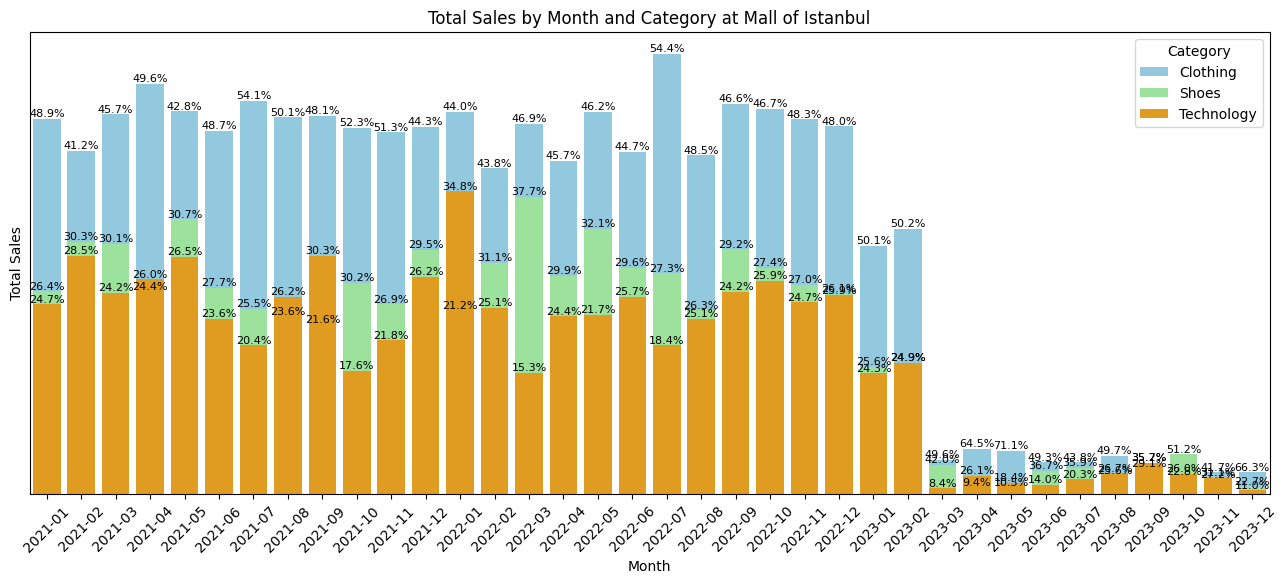

In [59]:
# Filter data untuk Mall of Istanbul dan kategori Clothing, Shoes, dan Technology
moi_category_data = retail[(retail['shopping_mall'] == 'Mall of Istanbul') & (retail['category'].isin(['Clothing', 'Shoes', 'Technology']))].copy()

# Konversi kolom invoice_date menjadi tipe data datetime
moi_category_data['invoice_date'] = pd.to_datetime(moi_category_data['invoice_date'])

# Ekstrak bulan dari invoice_date sebagai string
moi_category_data['bulan'] = moi_category_data['invoice_date'].dt.strftime('%Y-%m')

# Menghitung total penjualan per bulan
total_sales_by_month = moi_category_data.groupby('bulan')['total_sales'].sum()

# Menghitung total penjualan per bulan dan kategori
sales_by_month_category = moi_category_data.groupby(['bulan', 'category'])['total_sales'].sum().unstack()

# Membuat grafik stack bar dengan Seaborn
plt.figure(figsize=(16, 6))  # Ukuran keseluruhan grafik
sns.barplot(data=sales_by_month_category.reset_index(), x='bulan', y='Clothing', color='skyblue', label='Clothing')
sns.barplot(data=sales_by_month_category.reset_index(), x='bulan', y='Shoes', color='lightgreen', label='Shoes')
sns.barplot(data=sales_by_month_category.reset_index(), x='bulan', y='Technology', color='orange', label='Technology')
plt.title('Total Sales by Month and Category at Mall of Istanbul')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.yticks([])  # Menghilangkan angka pada sumbu y

# Menampilkan persentase komposisi pada label bar
for i, month in enumerate(sales_by_month_category.index):
    total_sales = total_sales_by_month[month]
    for category in sales_by_month_category.columns:
        sales = sales_by_month_category.loc[month, category]
        percentage = (sales / total_sales) * 100
        plt.text(i, sales, '{:.1f}%'.format(percentage), ha='center', va='bottom', color='black', fontsize=8)

plt.legend(title='Category')
plt.show()


#### Correlation

C:\Users\USER\AppData\Local\Temp\ipykernel_5196\1854133062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = retail.corr()


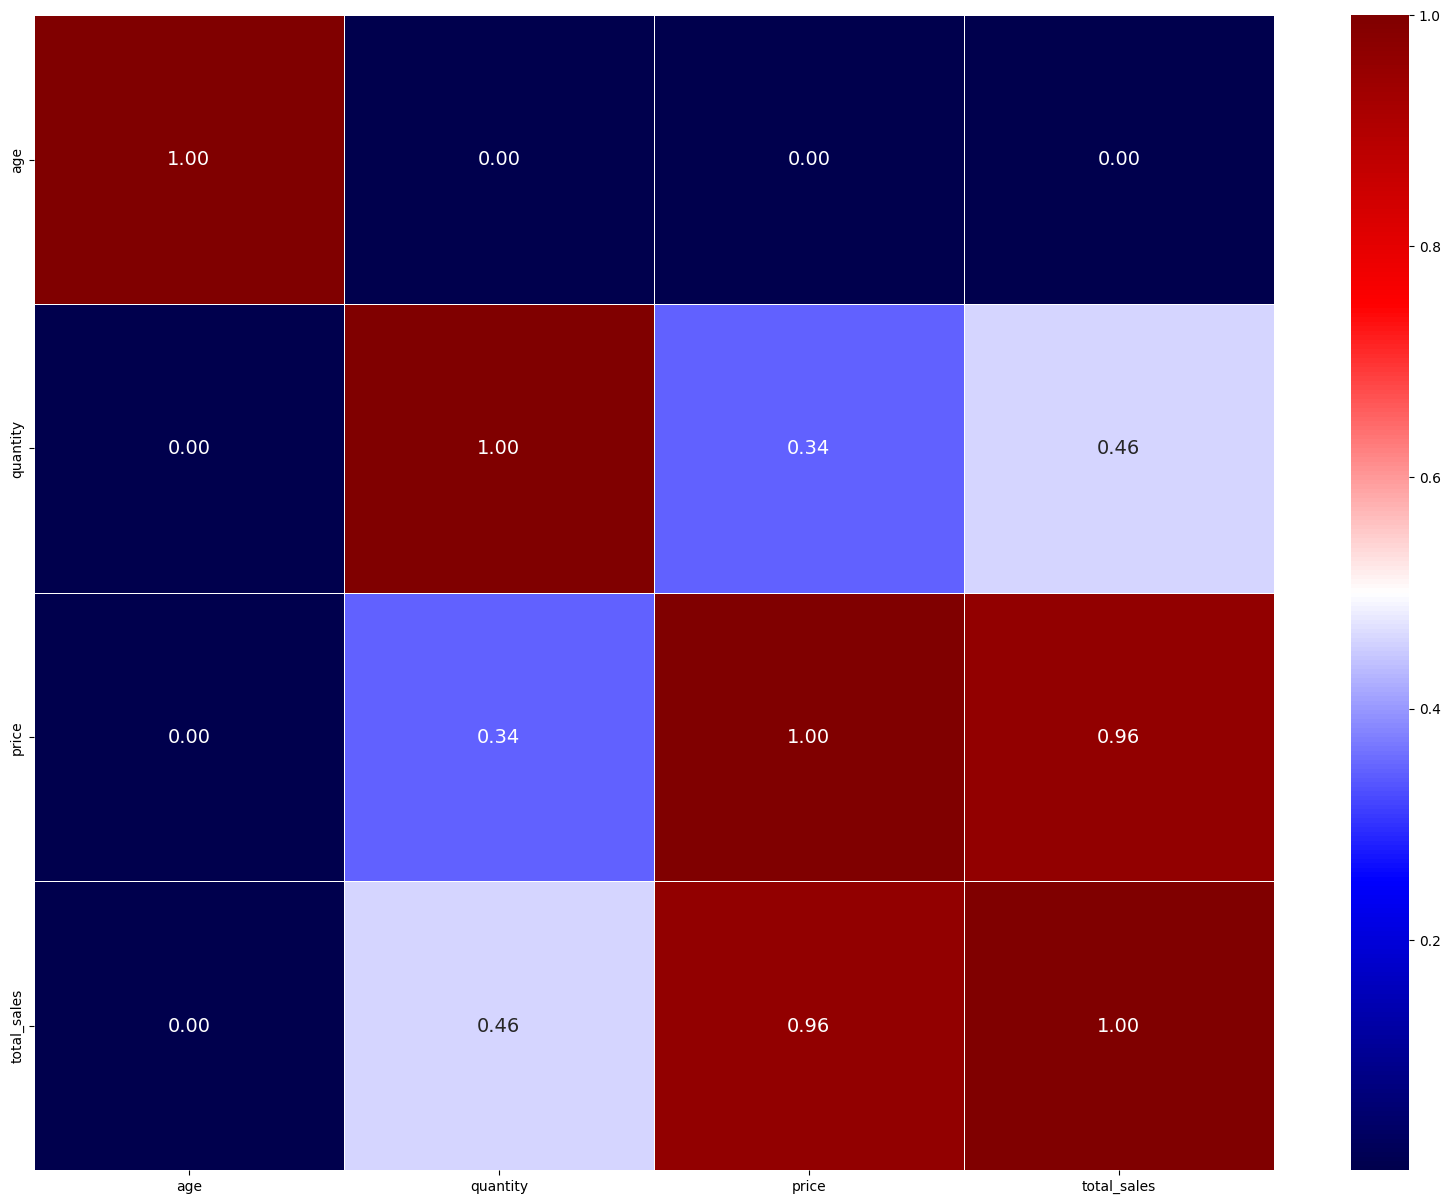

In [60]:
corr_matrix = retail.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', linewidths=0.5, cmap="seismic", annot_kws={"fontsize": 14})

plt.show()

### Cohort Analysis

In [61]:
#retail.head()

In [62]:
#def get_month(x): return dt.datetime(x.year, x.month, 1)
#retail['InvoiceMonth'] = retail['invoice_date'].apply(get_month)
#grouping = retail.groupby('customer_id')['InvoiceMonth']
#retail['CohortMonth'] = grouping.transform('min')
#retail.head()

In [63]:
#def get_date_int(df, column):
#    year = df[column].dt.year
#    month = df[column].dt.month
#    day = df[column].dt.day
#    return year, month, day

In [64]:
#invoice_year, invoice_month, _ = get_date_int(retail, 'InvoiceMonth')
#cohort_year, cohort_month, _ = get_date_int(retail, 'CohortMonth')
#years_diff = invoice_year - cohort_year
#months_diff = invoice_month - cohort_month
#retail['CohortIndex'] = years_diff * 12 + months_diff + 1
#retail.head()

In [65]:
#grouping = retail.groupby(['CohortMonth', 'CohortIndex'])
#cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
#cohort_data = cohort_data.reset_index()
#cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')
#print(cohort_counts)